### Facebook analysis for EgyptionGeekJobs group

Here we are gonna do some basic analysis for a public FB group
My main goals here are 
- know about FB graph API
- deal with real world data and try to do basic processing on it
- make a basic analysis on this data

so let's start with first making an FB developer account to get access to the Graph API, it's straightforward, you can use your current FB account to make it 
this link will help you to get started https://developers.facebook.com/docs/graph-api
you will need to log in with your current FB account or make one, once you do this, go to your dashboard and make a new app
 <img src="newapp.PNG">
 
 then write a name for your app
 
 
 <img src="displayname.PNG">
 
 after you are done, go to your dashboard, you will find your app and some important info about it, like the appid and the app secret
 <b>DON'T MAKE THIS INFO AVAILABLE FOR ANYBODY</b>
 
 Ehm, sorry for the loudy text, but seriously , this info should be secret 
 <img src="appid.PNG">
 
 Now we are ready to have some fun! :D

First we import some liberaries we will need, don't bother now, you will see their usage later here

In [1]:
import json
import requests, urllib
import pandas as pd
from collections import Counter,OrderedDict
import matplotlib.pyplot as plt
import string
import operator
plt.rcParams['figure.figsize'] = (12, 8)

then we make a config.json file and write down our appid and appsecrete in it , the structure of the config file is simple 
<code>
{
    "APPID":"here put your app id",
    "APPSECRET":"here put your app secret"
}
</code>
we just open the file and get the info, this way we made our data encapsoulated 

In [2]:
with open("config.json") as f :
    config = json.load(f)
app_id = config["APPID"]
app_secret = config["APPSECRET"]

Here I got the group Id, you can get any group id from the link or you can use this site https://lookup-id.com/ 

if it's not in the link, like the EgyptionGeeksJobs group 

According to the Graph API, the group should be public or a group you own


In [3]:
egyption_geeks_jobs_id = "673428112750757"
#the access token is made from your appid and appsecret
token = "{}|{}".format(app_id,app_secret)

<u>Now what's the plan ?</u>

we first will get the basic feed from the group (posts and it's date) then try to know how many posts made for each month and what words that were used the most in these posts 

<u>WHY?</u>

this group is focused in tech job opportunities posts, knowing the which words are mostly used may help us to know what the market focuses on these days, and it's somehow fun to do :D

In [4]:
def get_posts_from_group(group_id, posts_limit=100):
    base = "https://graph.facebook.com/v2.9/"
    group = "{}/feed".format(group_id)
    params = "?access_token={}&limit={}".format(token,posts_limit)
    final_url = base + group + params
    req = urllib.request.Request(final_url)
    with urllib.request.urlopen(req) as response:
        data = response.read()
    return data

Here we make a request for 1000 posts and save the response data in a variable

In [5]:
data = get_posts_from_group(egyption_geeks_jobs_id,posts_limit=1000)

After we got our data, we are ready to clean/preprocess, let's convert it to json object and get our posts and dates

In [6]:
posts = json.loads(data.decode('utf8'))["data"]
posts_ls = []
dates = []
for post in posts:
    try:
        posts_ls.append(post.get("message"))
        dates.append(post.get("updated_time"))
    except:
        continue
    

then let's make our pandas dataframe, 

If you don't know pandas, it's a great liberary to deal with data , it makes your data in simple structure that you can deal with easlly

In [7]:
data_frame = pd.DataFrame({"post":posts_ls,"date":dates})

here we drop the data that misses post msg or date, just to make sure that all of our data complete

In [8]:
data_frame = data_frame.dropna()

let's check !

In [11]:
data_frame.head(n=10)

,date,post
0,2017-06-15T15:55:08+0000,Urgently Required PHP Developer\n\nPHP Develop...
1,2017-06-15T12:06:56+0000,We are looking for a senior frontend developer...
2,2017-06-15T12:05:59+0000,Android Developer needed for Start up company ...
3,2017-06-15T11:27:39+0000,Alexandria for programming looking for softwar...
4,2017-06-15T09:18:29+0000,I'm 30 years old worked in europe for more tha...
5,2017-06-15T08:15:15+0000,We are looking for the Software Engineer - Clo...
6,2017-06-15T07:46:54+0000,UX/UI Developer is required with a good taste ...
8,2017-06-14T21:17:11+0000,انضموا لأكبر دبلومه مشاريع الكترونيه علميه في ...
9,2017-06-14T13:12:52+0000,Job Vacancy\nBasic Qualifications:\n• B Sc. of...
10,2017-06-14T12:24:40+0000,We are hiring a creative web designers( UI/UX...


In [12]:
data_frame["post"][0]

'Urgently Required PHP Developer\n\nPHP Developer required for company located in Mansoura , Egypt.\nIf you are interested in this opportunity, please send your Resume to mr.midonada4@gmail.com and write "PHP Developer" in the subject\n------------------------------------------------------------\nUrgently Required Hybrid mobile application Developer && IOS Developer.\n\nHybrid mobile application Developer && IOS Developer required for company located in Mansoura , Egypt.\nIf you are interested in this opportunity, please send your Resume to mr.midonada4@gmail.com  and write his target position in the subject'

now let's make our first move, we want to make a graph describes the num of posts for each month, so let's make a column with the month of each post

as we see , the dates are in this format 
<code>
	2017-06-15T15:55:08+0000
</code>
we only need to get this
<code>
    2017-06
</code>
so let's split the date and get the first 2 items and join them again with "-"

or you also can get the first 7 letters from each date :D , it's your call , I'll stick with the first one because I see it more general

In [14]:
months = list(map( lambda date : "-".join(date.split("-")[:2]), data_frame["date"]))

let's now add it to the dataframe 

In [15]:
data_frame["month"] = months

It's time to plot the data :D 
I use matplotlib for plotting , it's easy and efficient and has nice community 
all we need to do is to count how many posts for each month, i used here the builtin python collections to do the work

<code>Counter</code> to make a counter object of the data, it contains each element and how many times it appeared 

<code>OrderedDict</code> to make a nice dictionary object to deal with 

and then I used the matplotlib directly to plot the data

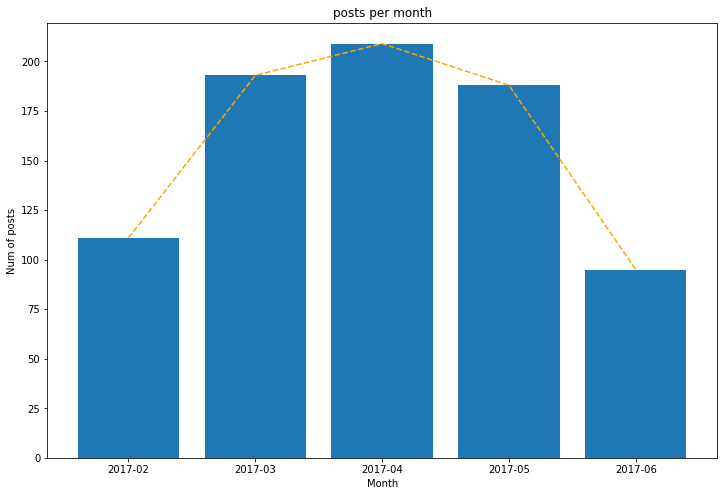

In [16]:
monthly_interactions = OrderedDict(sorted(Counter(data_frame["month"]).items()))
plt.bar(range(len(monthly_interactions.keys())), monthly_interactions.values())
plt.plot(range(len(monthly_interactions.keys())), list(monthly_interactions.values()),'--', color="orange")
plt.xticks(range(len(monthly_interactions.keys())),monthly_interactions.keys())
plt.title("posts per month")
plt.xlabel("Month")
plt.ylabel("Num of posts")
plt.show()

now it's time to deal with posts and do some preprocess on it 
let's start with removing the stop words like (I, he, she, ...etc) it's some how irrelvant to what we need to discover

I'll use the NLTK liberary here, it's a great liberary for natural language processing

In [17]:
from nltk.corpus import stopwords

this function is somehow straight forward, it searchs for each word of the stopwords in the post and return a new vesion of the post without them

In [18]:
stops = set(stopwords.words("english"))
def remove_stopwords(post):
    post = post.lower().split()
    p_post = []
    for word in post:
        if word not in stops:
            p_post.append(word)
    final_post = " ".join(p_post)
    return final_post

Now Let's apply our functions to all the posts and make  a new column for the processed posts

In [19]:
data_frame["processed_posts"] = list(map(lambda post : remove_stopwords(post) , data_frame["post"]))

let's take a look !

In [20]:
data_frame.head(n=10)

,date,post,month,processed_posts
0,2017-06-15T15:55:08+0000,Urgently Required PHP Developer\n\nPHP Develop...,2017-06,urgently required php developer php developer ...
1,2017-06-15T12:06:56+0000,We are looking for a senior frontend developer...,2017-06,looking senior frontend developer experience h...
2,2017-06-15T12:05:59+0000,Android Developer needed for Start up company ...,2017-06,android developer needed start company : compa...
3,2017-06-15T11:27:39+0000,Alexandria for programming looking for softwar...,2017-06,alexandria programming looking software develo...
4,2017-06-15T09:18:29+0000,I'm 30 years old worked in europe for more tha...,2017-06,"i'm 30 years old worked europe 6 years, worked..."
5,2017-06-15T08:15:15+0000,We are looking for the Software Engineer - Clo...,2017-06,looking software engineer - cloud applications...
6,2017-06-15T07:46:54+0000,UX/UI Developer is required with a good taste ...,2017-06,"ux/ui developer required good taste design, bu..."
8,2017-06-14T21:17:11+0000,انضموا لأكبر دبلومه مشاريع الكترونيه علميه في ...,2017-06,انضموا لأكبر دبلومه مشاريع الكترونيه علميه في ...
9,2017-06-14T13:12:52+0000,Job Vacancy\nBasic Qualifications:\n• B Sc. of...,2017-06,job vacancy basic qualifications: • b sc. comp...
10,2017-06-14T12:24:40+0000,We are hiring a creative web designers( UI/UX...,2017-06,hiring creative web designers( ui/ux) -full ti...


now let's make another move and remove all the puncituations !

In [41]:
def remove_punc(post):
    puncs = string.punctuation+"•"
    table = str.maketrans({key: None for key in puncs})
    return post.translate(table)

In [42]:
data_frame["processed_posts"] = list(map(lambda post: remove_punc(post), data_frame["processed_posts"]))

and also we can remove all the digits, it's somehow not useful for our case and will maek noise in our data

In [43]:
from string import digits
def remove_digits(post):
    remove_digits = str.maketrans('', '', digits)
    return post.translate(remove_digits)

In [44]:
data_frame["processed_posts"] = list(map(lambda post: remove_digits(post), data_frame["processed_posts"]))

now let's count all the words and see what words that are mostly used in these posts

here I make a Counter for each post and then sums them all to get the final all over counts

In [45]:
data_frame["count_all_words"] = list(map(lambda post:Counter(post.split()), data_frame["processed_posts"]))

In [46]:
data_frame

,date,post,month,processed_posts,count_all_words
0,2017-06-15T15:55:08+0000,Urgently Required PHP Developer\n\nPHP Develop...,2017-06,urgently required php developer php developer ...,"{'egypt': 2, 'hybrid': 2, 'opportunity': 2, 'p..."
1,2017-06-15T12:06:56+0000,We are looking for a senior frontend developer...,2017-06,looking senior frontend developer experience h...,"{'to': 1, 'frameworks': 1, 'resume': 1, 'great..."
2,2017-06-15T12:05:59+0000,Android Developer needed for Start up company ...,2017-06,android developer needed start company compan...,"{'subject': 1, 'town': 1, 'opensource': 1, 'te..."
3,2017-06-15T11:27:39+0000,Alexandria for programming looking for softwar...,2017-06,alexandria programming looking software develo...,"{'contract': 1, 'laravel': 1, 'programming': 1..."
4,2017-06-15T09:18:29+0000,I'm 30 years old worked in europe for more tha...,2017-06,im years old worked europe years worked game...,"{'old': 1, 'job': 1, 'game': 1, 'looking': 1, ..."
5,2017-06-15T08:15:15+0000,We are looking for the Software Engineer - Clo...,2017-06,looking software engineer cloud applications ...,"{'developing': 1, 'networking': 1, 'databases'..."
6,2017-06-15T07:46:54+0000,UX/UI Developer is required with a good taste ...,2017-06,uxui developer required good taste design buil...,"{'uxui': 1, 'frameworks': 1, 'cairo': 1, 'fami..."
8,2017-06-14T21:17:11+0000,انضموا لأكبر دبلومه مشاريع الكترونيه علميه في ...,2017-06,انضموا لأكبر دبلومه مشاريع الكترونيه علميه في ...,"{'مصر': 1, 'انضموا': 1, 'الكترونيه': 1, 'وير':..."
9,2017-06-14T13:12:52+0000,Job Vacancy\nBasic Qualifications:\n• B Sc. of...,2017-06,job vacancy basic qualifications b sc compute...,"{'signal': 1, 'processing': 1, 'subject': 2, '..."
10,2017-06-14T12:24:40+0000,We are hiring a creative web designers( UI/UX...,2017-06,hiring creative web designers uiux full time ...,"{'location': 1, 'luck': 1, 'basic': 1, 'css': ..."


In [50]:
all_counts=Counter()
for i in data_frame["count_all_words"]:
    all_counts +=i

now, it's time to plot them and see what we have

In [51]:
 common_words = OrderedDict(sorted(all_counts.items(),key=operator.itemgetter(1)))

let's draw the first 25 used words

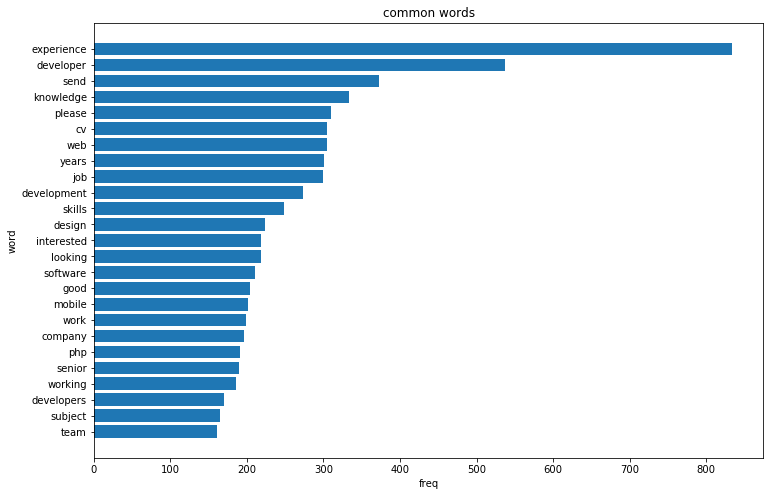

In [52]:
plt.barh(range(25),list(common_words.values())[-25:])
plt.yticks(range(25),list(common_words.keys())[-25:])
plt.title("common words")
plt.xlabel("freq")
plt.ylabel("word")
plt.show()

here we notice that some techs and fields like (web, design) are mentioned more than others this period than others

finally,
I hope the main goals mentioned early i somehow acheived ! and also I also hope you had fun :D
see you later!